# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import LSTM

In [2]:
df1 = pd.read_csv('Features data set.csv')
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
df2 = pd.read_csv('sales data-set.csv')
df2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
df3 = pd.read_csv('stores data-set.csv')
df3.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# Data Preparation

In [5]:
df = df1.merge(df3, on = 'Store')
df = df2.merge(df, on = ['Store','Date', 'IsHoliday'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [7]:
df=df.fillna(0)

In [8]:
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")
df['Type'] = df['Type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  category      
 15  Size          421

In [9]:
df.groupby(['Store', 'Dept','Date']).count()

Weekly_Sales  IsHoliday  Temperature  Fuel_Price   
Store Dept Date                                                           
1     1    2010-02-05             1          1            1           1  \
           2010-02-12             1          1            1           1   
           2010-02-19             1          1            1           1   
           2010-02-26             1          1            1           1   
           2010-03-05             1          1            1           1   
...                             ...        ...          ...         ...   
45    98   2012-09-28             1          1            1           1   
           2012-10-05             1          1            1           1   
           2012-10-12             1          1            1           1   
           2012-10-19             1          1            1           1   
           2012-10-26             1          1            1           1   

                       MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5   
Store Dept Date                                                                
1     1    2010-02-05          1          1          1          1          1  \
           2010-02-12          1          1          1          1          1   
           2010-02-19          1          1          1          1          1   
           2010-02-26          1          1          1          1          1   
           2010-03-05          1          1          1          1          1   
...                          ...        ...        ...        ...        ...   
45    98   2012-09-28          1          1          1          1          1   
           2012-10-05          1          1          1          1          1   
           2012-10-12          1          1          1          1          1   
           2012-10-19          1          1          1          1          1   
           2012-10-26          1          1          1          1          1   

                       CPI  Unemployment  Type  Size  
Store Dept Date                                       
1     1    2010-02-05    1             1     1     1  
           2010-02-12    1             1     1     1  
           2010-02-19    1             1     1     1  
           2010-02-26    1             1     1     1  
           2010-03-05    1             1     1     1  
...                    ...           ...   ...   ...  
45    98   2012-09-28    1             1     1     1  
           2012-10-05    1             1     1     1  
           2012-10-12    1             1     1     1  
           2012-10-19    1             1     1     1  
           2012-10-26    1             1     1     1  

[421570 rows x 13 columns]

In [10]:
df[['Store', 'Dept']].value_counts()

Store  Dept
1      1       143
40     55      143
       59      143
24     49      143
       50      143
              ... 
21     50        1
42     34        1
36     36        1
25     96        1
23     99        1
Name: count, Length: 3331, dtype: int64

In [11]:
St = 24
Dt = 50

In [12]:
df_d = df[(df['Store']==St) & (df['Dept']==Dt)]
df_d

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
226912,24,50,2010-02-05,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326,A,203819
226985,24,50,2010-02-12,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326,A,203819
227059,24,50,2010-02-19,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326,A,203819
227130,24,50,2010-02-26,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326,A,203819
227201,24,50,2010-03-05,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,A,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236783,24,50,2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,A,203819
236854,24,50,2012-10-05,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,A,203819
236926,24,50,2012-10-12,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,A,203819
236999,24,50,2012-10-19,1151.0,False,52.59,4.153,3446.70,0.00,101.00,111.46,5963.01,138.833613,8.693,A,203819


# Predict the department-wide sales 


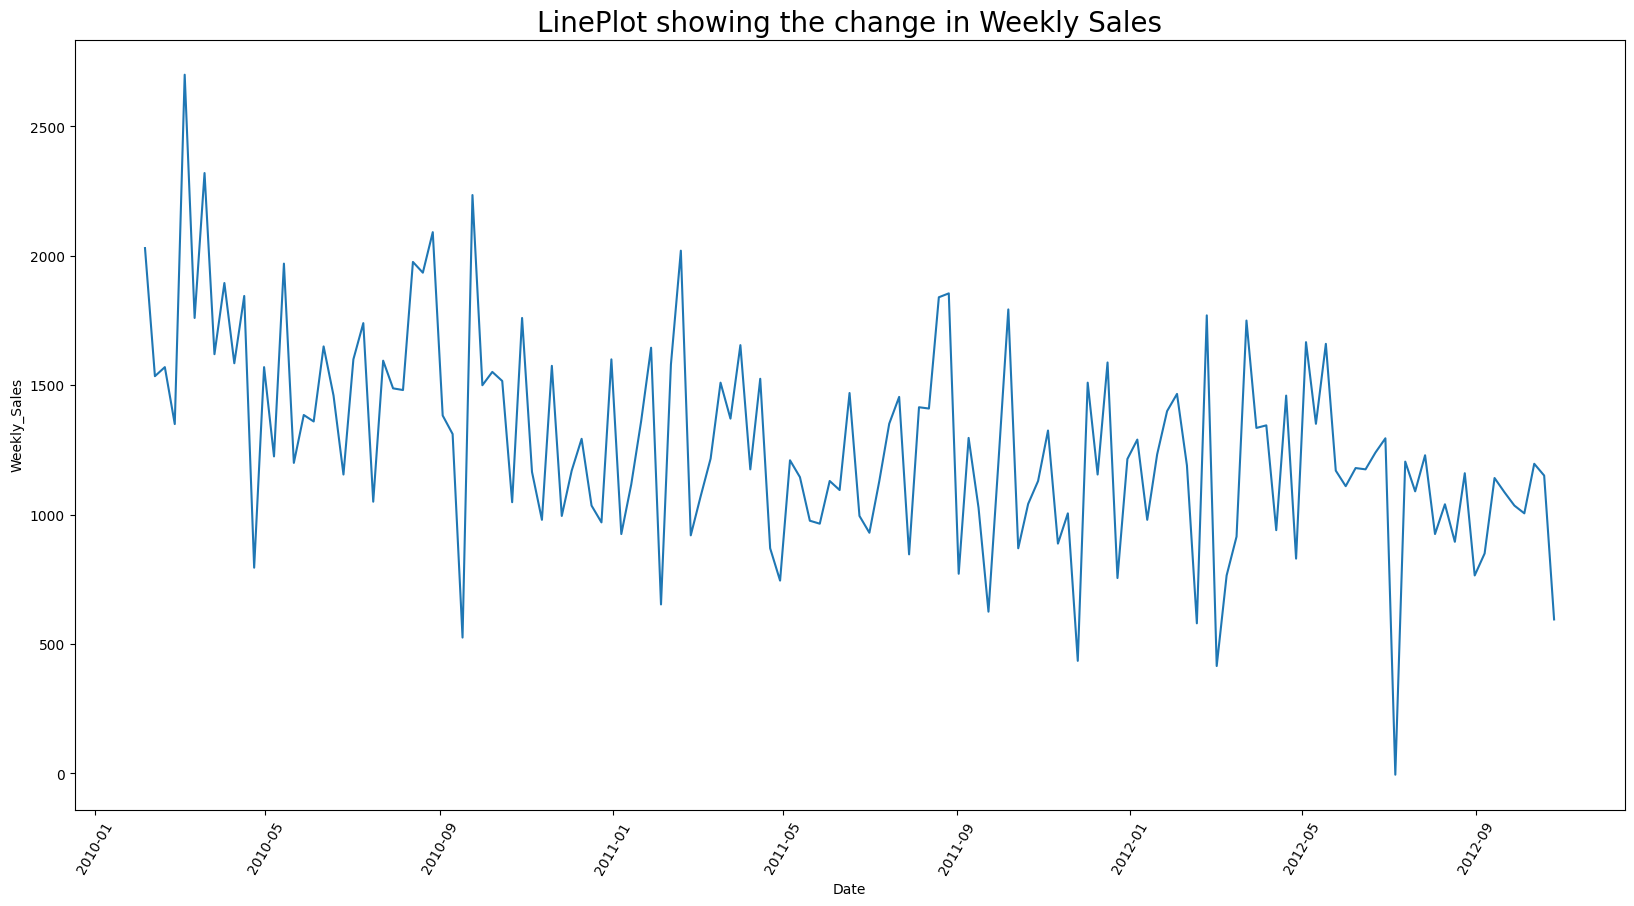

In [13]:
plt.figure
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', )
_ = plt.title('LinePlot showing the change in Weekly Sales', fontsize=20)
plt.show()

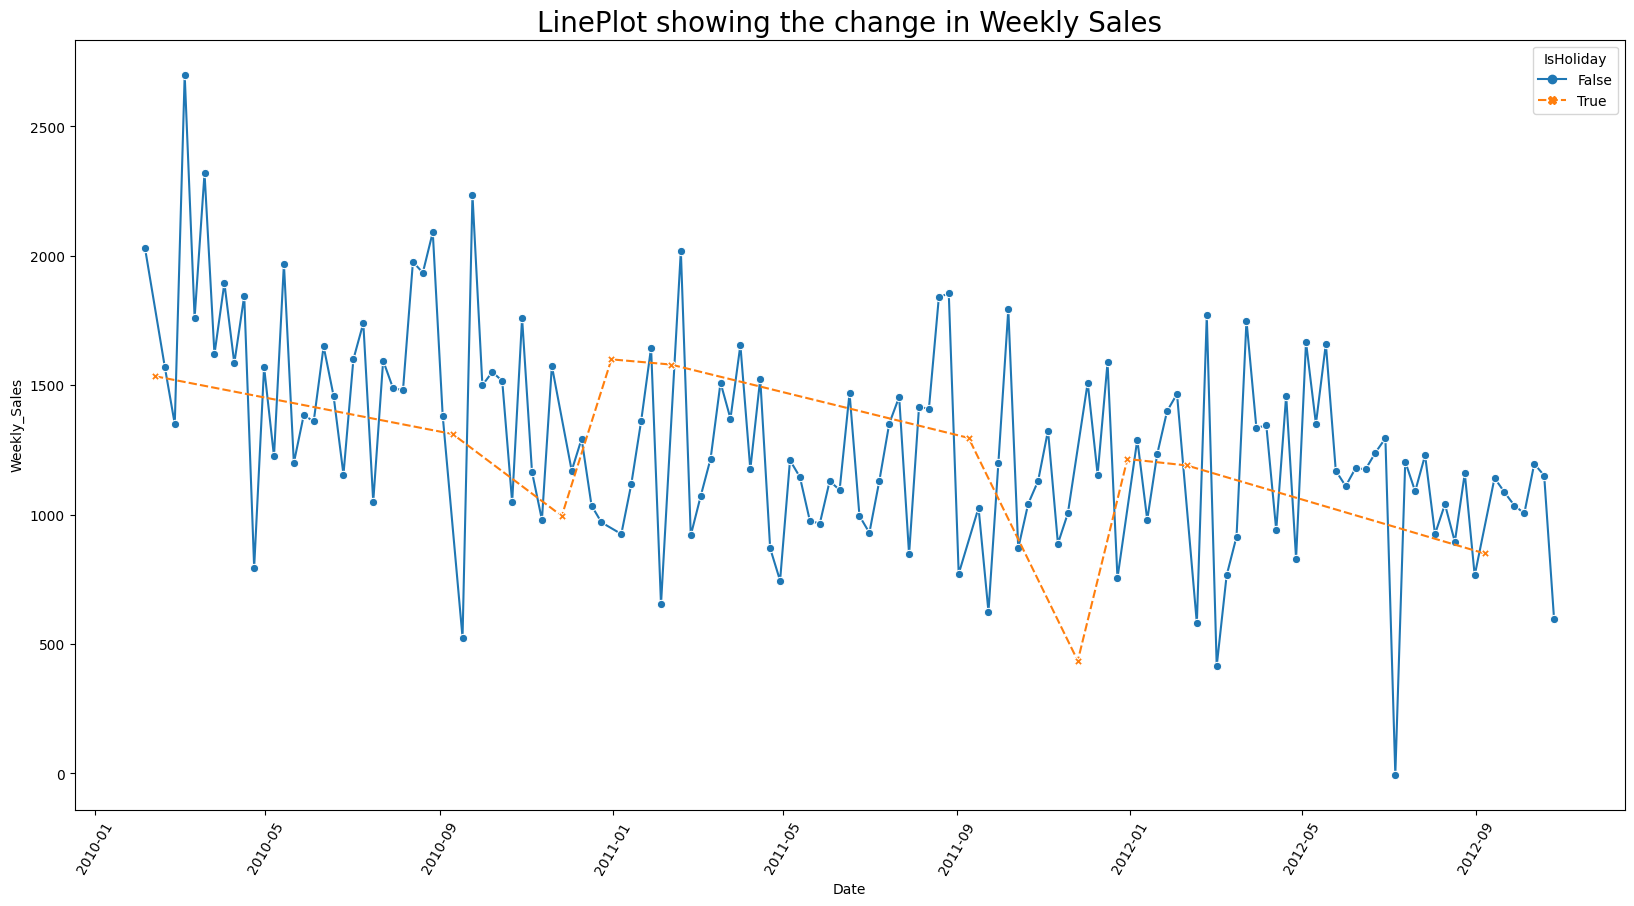

In [14]:
plt.figure
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', hue = 'IsHoliday',style = 'IsHoliday', markers = True, errorbar = ('ci', 68))
_ = plt.title('LinePlot showing the change in Weekly Sales', fontsize=20)
plt.show()

In [15]:
ts = df_d[['Date', 'Weekly_Sales']]
ts = ts.set_index('Date')
ts = ts['Weekly_Sales']
ts

Date
2010-02-05    2030.0
2010-02-12    1535.0
2010-02-19    1570.0
2010-02-26    1350.0
2010-03-05    2700.0
               ...  
2012-09-28    1035.0
2012-10-05    1005.0
2012-10-12    1196.5
2012-10-19    1151.0
2012-10-26     595.0
Name: Weekly_Sales, Length: 143, dtype: float64

0     1.000000
1     0.130103
2     0.263880
3     0.136014
4     0.311210
5     0.126184
6     0.245963
7     0.088694
8     0.253053
9     0.071838
10    0.154257
Name: Correlation Coeff, dtype: float64
0     1.000000
1     0.131019
2     0.254831
3     0.086411
4     0.254782
5     0.043069
6     0.131390
7    -0.013168
8     0.127694
9    -0.028223
10    0.000674
Name: Partial Correlation Coeff, dtype: float64


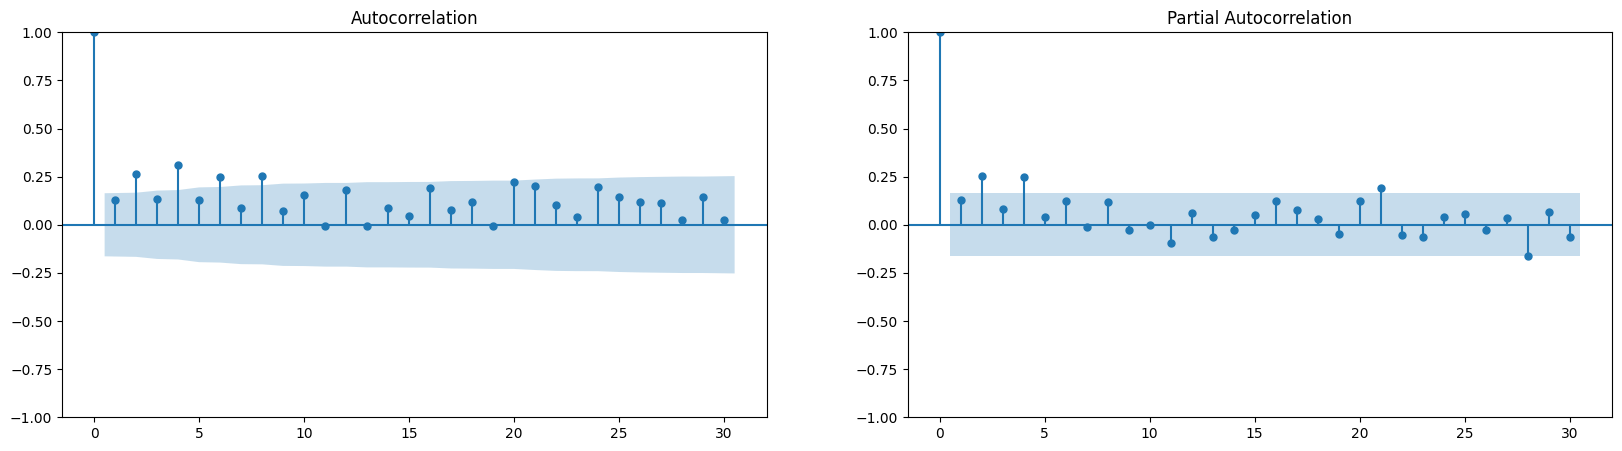

In [16]:
print(pd.Series(acf(ts,nlags=10), name = "Correlation Coeff"))
print(pd.Series(pacf(ts,nlags=10), name = "Partial Correlation Coeff"))


fig, axes = plt.subplots(1,2, figsize=(20,5))
_ = plot_acf(ts, lags=30, ax=axes[0])
_ = plot_pacf(ts, lags=30, ax=axes[1])

### Dataset creation

In [17]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):
    """
    Transformation into a training sample taking into account the lag
     : param in_data: Input fields
     : param tar_data: Output field (single)
     : param n_in: Lag shift
     : param dropnan: Do destroy empty lines
     : param target_dep: Whether to take into account the lag of the input field If taken into account, the input will start with lag 1
     : return: Training sample. The last field is the source
    """

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [18]:
dataset = series_to_supervised(pd.DataFrame(ts), ts, 4)
dataset

,Weekly_Sales(t-0),Weekly_Sales(t-1),Weekly_Sales(t-2),Weekly_Sales(t-3),Weekly_Sales(t-4),Weekly_Sales
Date,,,,,,
2010-03-05,2700.0,1350.0,1570.0,1535.0,2030.0,2700.0
2010-03-12,1760.0,2700.0,1350.0,1570.0,1535.0,1760.0
2010-03-19,2320.0,1760.0,2700.0,1350.0,1570.0,2320.0
2010-03-26,1620.0,2320.0,1760.0,2700.0,1350.0,1620.0
2010-04-02,1895.0,1620.0,2320.0,1760.0,2700.0,1895.0
...,...,...,...,...,...,...
2012-09-28,1035.0,1086.5,1141.5,850.0,765.0,1035.0
2012-10-05,1005.0,1035.0,1086.5,1141.5,850.0,1005.0
2012-10-12,1196.5,1005.0,1035.0,1086.5,1141.5,1196.5


In [19]:
col = dataset.columns
X, Y = dataset[col[1:-1]], dataset[col[-1]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['Weekly_Sales(t-1)', 'Weekly_Sales(t-2)', 'Weekly_Sales(t-3)',
       'Weekly_Sales(t-4)'],
      dtype='object')
Target: Weekly_Sales


### Data normalization

In [20]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

In [22]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

### Linear Regression

In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred_test_ln = regressor.predict(x_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

In [26]:
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.12826507500598916
Correlation test -0.09385443205786381
Mean Absolute Error: 1218.9282051415503
Mean Squared Error: 1496069.2012173072
Root Mean Squared Error: 1223.139076809055


### Backpropagation Neural Network

In [27]:
def BP_model(X):
    """
    Multilayer neural network with back propagation .
    :param X: Input DataSet
    :return: keras NN model
    """
    # create model
    model = Sequential() 
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [30]:
epochs = 1000
batch_size=int(y_train.shape[0]*.1)
estimator = KerasRegressor(model=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=1)

In [31]:
es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1,  restore_best_weights=True)
history=estimator.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[es]) # Fitting model

Epoch 1/1000
11/11 [==============================] - 1s 19ms/step - loss: 0.2121 - val_loss: 0.0997
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0893 - val_loss: 0.0188
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0316 - val_loss: 0.0368
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0264 - val_loss: 0.0165
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0268 - val_loss: 0.0165
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.0185
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0223 - val_loss: 0.0177
Epoch 8/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0214 - val_loss: 0.0172
Epoch 9/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0245 - val_loss: 0.0173
Epoch 10/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0226 - val_loss: 0.017

11/11 [==============================] - 0s 4ms/step - loss: 0.0202 - val_loss: 0.0165
Epoch 83/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0193 - val_loss: 0.0185
Epoch 84/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0241 - val_loss: 0.0172
Epoch 85/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0213 - val_loss: 0.0164
Epoch 86/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.0196
Epoch 87/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0207 - val_loss: 0.0171
Epoch 88/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0193 - val_loss: 0.0185
Epoch 89/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0206 - val_loss: 0.0168
Epoch 90/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.0174
Epoch 91/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0216 - val_loss: 0.0170
Epoc

11/11 [==============================] - 0s 7ms/step - loss: 0.0197 - val_loss: 0.0189
Epoch 163/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0169
Epoch 164/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0205 - val_loss: 0.0184
Epoch 165/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0207 - val_loss: 0.0185
Epoch 166/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0210 - val_loss: 0.0163
Epoch 167/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0201 - val_loss: 0.0184
Epoch 168/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.0170
Epoch 169/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.0172
Epoch 170/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0193 - val_loss: 0.0193
Epoch 171/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0207 - val_loss: 0.

11/11 [==============================] - 0s 5ms/step - loss: 0.0203 - val_loss: 0.0172
Epoch 243/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0196 - val_loss: 0.0178
Epoch 244/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0181 - val_loss: 0.0184
Epoch 245/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.0168
Epoch 246/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0188
Epoch 247/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0195 - val_loss: 0.0168
Epoch 248/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0188 - val_loss: 0.0188
Epoch 249/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0182 - val_loss: 0.0180
Epoch 250/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0194 - val_loss: 0.0172
Epoch 251/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0198 - val_loss: 0.

11/11 [==============================] - 0s 6ms/step - loss: 0.0185 - val_loss: 0.0188
Epoch 323/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0198 - val_loss: 0.0182
Epoch 324/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0180 - val_loss: 0.0178
Epoch 325/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.0202
Epoch 326/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0181 - val_loss: 0.0185
Epoch 327/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0172 - val_loss: 0.0191
Epoch 328/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0189 - val_loss: 0.0174
Epoch 329/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0188 - val_loss: 0.0187
Epoch 330/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0190 - val_loss: 0.0195
Epoch 331/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0180 - val_loss: 0.

11/11 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 403/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0190
Epoch 404/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0170 - val_loss: 0.0189
Epoch 405/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0181
Epoch 406/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0179 - val_loss: 0.0194
Epoch 407/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0189 - val_loss: 0.0189
Epoch 408/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.0203
Epoch 409/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0184 - val_loss: 0.0189
Epoch 410/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0172 - val_loss: 0.0185
Epoch 411/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.

11/11 [==============================] - 0s 5ms/step - loss: 0.0171 - val_loss: 0.0200
Epoch 483/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0153 - val_loss: 0.0213
Epoch 484/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0167 - val_loss: 0.0202
Epoch 485/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0206
Epoch 486/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0186
Epoch 487/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0230
Epoch 488/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0175 - val_loss: 0.0210
Epoch 489/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0188 - val_loss: 0.0208
Epoch 490/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.0186
Epoch 491/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0190 - val_loss: 0.

11/11 [==============================] - 0s 5ms/step - loss: 0.0167 - val_loss: 0.0216
Epoch 563/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0176 - val_loss: 0.0212
Epoch 564/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0173 - val_loss: 0.0199
Epoch 565/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.0229
Epoch 566/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.0215
Epoch 567/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0176 - val_loss: 0.0196
Epoch 568/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0171 - val_loss: 0.0217
Epoch 569/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0176 - val_loss: 0.0212
Epoch 570/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0198
Epoch 571/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0169 - val_loss: 0.

11/11 [==============================] - 0s 5ms/step - loss: 0.0159 - val_loss: 0.0211
Epoch 643/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0171 - val_loss: 0.0224
Epoch 644/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0165 - val_loss: 0.0208
Epoch 645/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0171 - val_loss: 0.0211
Epoch 646/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0158 - val_loss: 0.0228
Epoch 647/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0207
Epoch 648/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0154 - val_loss: 0.0227
Epoch 649/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0164 - val_loss: 0.0206
Epoch 650/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0162 - val_loss: 0.0231
Epoch 651/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0164 - val_loss: 0.

11/11 [==============================] - 0s 5ms/step - loss: 0.0152 - val_loss: 0.0238
Epoch 723/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0161 - val_loss: 0.0221
Epoch 724/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.0207
Epoch 725/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0159 - val_loss: 0.0260
Epoch 726/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0163 - val_loss: 0.0222
Epoch 727/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0169 - val_loss: 0.0223
Epoch 728/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.0227
Epoch 729/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.0222
Epoch 730/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0171 - val_loss: 0.0241
Epoch 731/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0169 - val_loss: 0.

11/11 [==============================] - 0s 5ms/step - loss: 0.0169 - val_loss: 0.0215
Epoch 803/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0164 - val_loss: 0.0229
Epoch 804/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0211
Epoch 805/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.0240
Epoch 806/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0165 - val_loss: 0.0211
Epoch 807/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0156 - val_loss: 0.0259
Epoch 808/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0169 - val_loss: 0.0215
Epoch 809/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.0223
Epoch 810/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0147 - val_loss: 0.0220
Epoch 811/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0144 - val_loss: 0.

11/11 [==============================] - 0s 4ms/step - loss: 0.0152 - val_loss: 0.0222
Epoch 883/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.0222
Epoch 884/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0149 - val_loss: 0.0228
Epoch 885/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.0236
Epoch 886/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.0225
Epoch 887/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0152 - val_loss: 0.0234
Epoch 888/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0144 - val_loss: 0.0233
Epoch 889/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.0220
Epoch 890/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.0229
Epoch 891/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0163 - val_loss: 0.

11/11 [==============================] - 0s 5ms/step - loss: 0.0154 - val_loss: 0.0253
Epoch 963/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.0220
Epoch 964/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0155 - val_loss: 0.0231
Epoch 965/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0147 - val_loss: 0.0244
Epoch 966/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0152 - val_loss: 0.0228
Epoch 967/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0149 - val_loss: 0.0240
Epoch 968/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0144 - val_loss: 0.0233
Epoch 969/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0139 - val_loss: 0.0231
Epoch 970/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.0219
Epoch 971/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.

In [36]:
plt.figure()
plt.plot(estimator.history['loss'], label='train')
plt.plot(estimator.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

AttributeError: 'KerasRegressor' object has no attribute 'history'

<Figure size 640x480 with 0 Axes>

In [ ]:
res_tr=estimator.predict(x_train)
res_ts=estimator.predict(x_test)
res_train_ANN=scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

In [ ]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

# LSTM